<a href="https://colab.research.google.com/github/jyotiprasadkurmi/Yulu-Case-Study/blob/main/yulu_cab_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = yellow>**Importing Dataset:**</font>

In [ ]:
#importing_dataset
!gdown 1-Q4CtDT8XdQmJ1fkRJOB9cjQm5BuYSh8

Downloading...
From: https://drive.google.com/uc?id=1-Q4CtDT8XdQmJ1fkRJOB9cjQm5BuYSh8
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 61.6MB/s]


#<font color = yellow>**About Yulu**</font>

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

##<font color = yellow>**Business Case Problem**</font>

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

#<font color = yellow>**Column Profiling:**</font>
 1. 📆datetime: datetime

2.  🌪️season: season (1: spring, 2: summer, 3: fall, 4: winter)

3. 🎄holiday : whether day is a holiday or not
4. 🧑‍💻workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

5. 🌤️weather:
  * 1: ☀️Clear, 🌤️Few clouds, ⛅️partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
  * 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

6. 🌡️temp: temperature in Celsius

7. 🌡️atemp: feeling temperature in Celsius

8. 🌡️humidity: humidity

9. 🌬️windspeed: wind speed

10. casual: count of casual users

11. registered: count of registered users

12. 🔢count: count of total rental bikes including both casual and registered

#<font color = yellow>**Importing_important_library:**</font>

In [ ]:
#importing_important_library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#checking_the_shape_of_the_dataset
df.shape

(10886, 12)

* Dataset has rows -> 10886, cols -> 12

In [ ]:
#checking_the_datatypes_of_all_the_columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#summary_statistics
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#checking_if_there_is_any_null_value
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* No null value is present in the dataset

In [ ]:
#information_abt_the_dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#checking_duplicates
df.duplicated().sum()

0

* No duplicated value in the dataset

##<font color = yellow>**Analyzing the distribution of Numerical & categorical columns**</font>

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


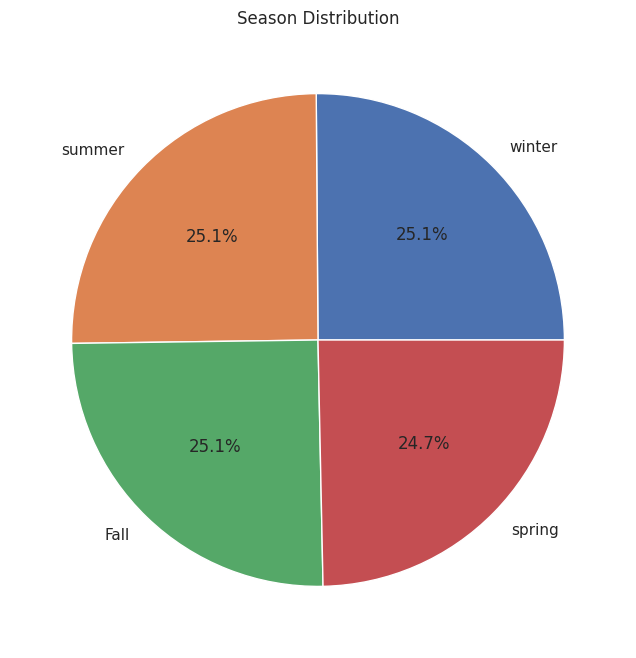

In [ ]:
# Distribution_of_seasons
plt.figure(figsize = (10,8))
season_counts = df['season'].value_counts()
sizes = season_counts.values

season_dict = {
    1 : 'spring',
    2 : 'summer',
    3 : 'Fall',
    4 : 'winter'
}

labels = [season_dict.get(key,key) for key in season_counts.index.tolist()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Season Distribution')

plt.show()

* Almost all the seasons are equally distributed at 25%

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


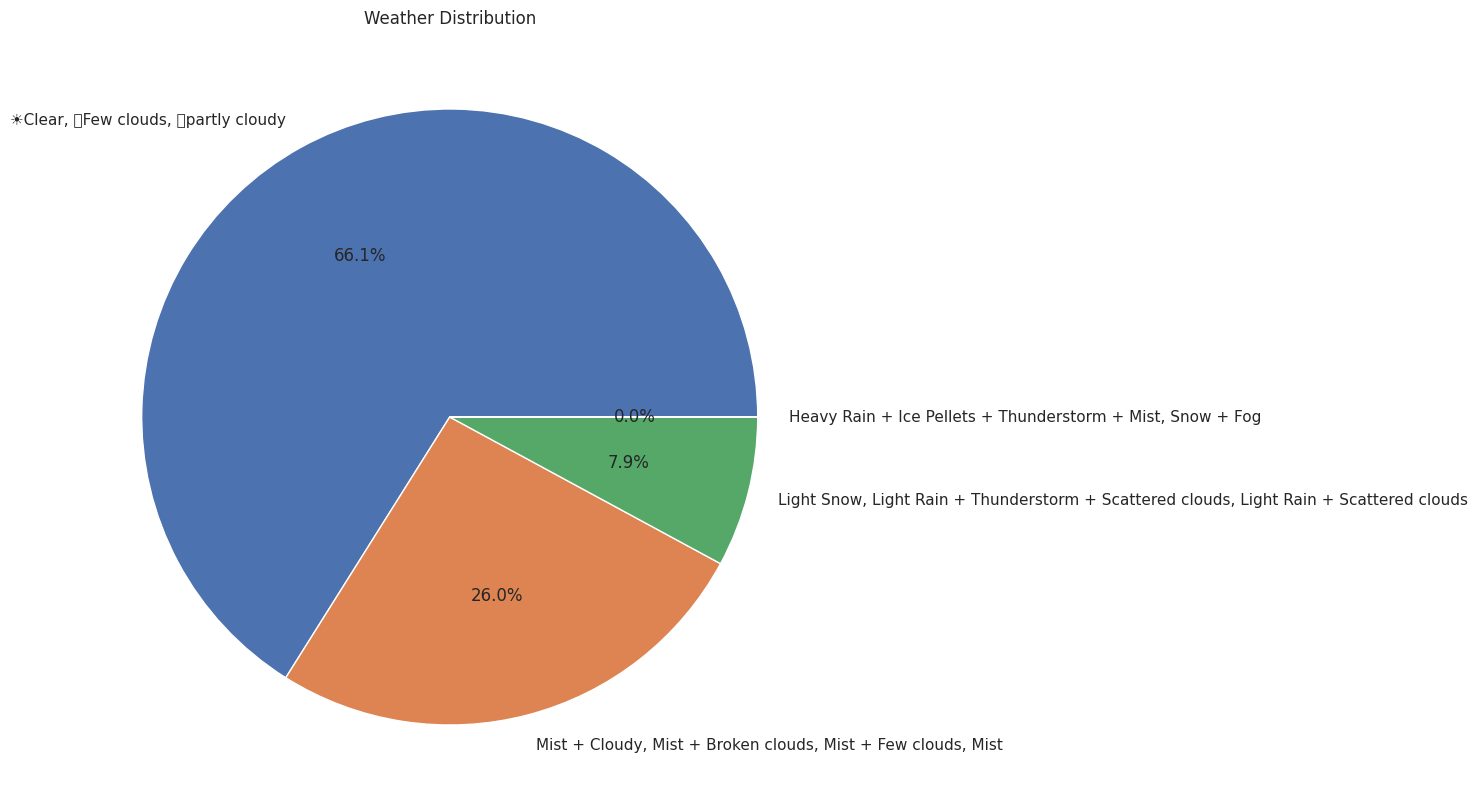

In [ ]:
#Weather_distribution

weather_counts = df['weather'].value_counts()

weather_labels_dict = {
    1: '☀️Clear, 🌤️Few clouds, ⛅️partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog'
}

labels = [weather_labels_dict.get(key, key) for key in weather_counts.index.tolist()]
sizes = weather_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Weather Distribution')
plt.show()

* 66.1% weather remains ☀️Clear, 🌤️Few clouds, ⛅️partly cloudy
* 26% of the weather remains Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 7.9% weather remains 🌨️Light Snow, Light Rain + ☔️Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 0.0% of weather remains 🌧️Heavy Rain + Ice Pellets + ⛈️Thunderstorm + Mist, Snow + Fog

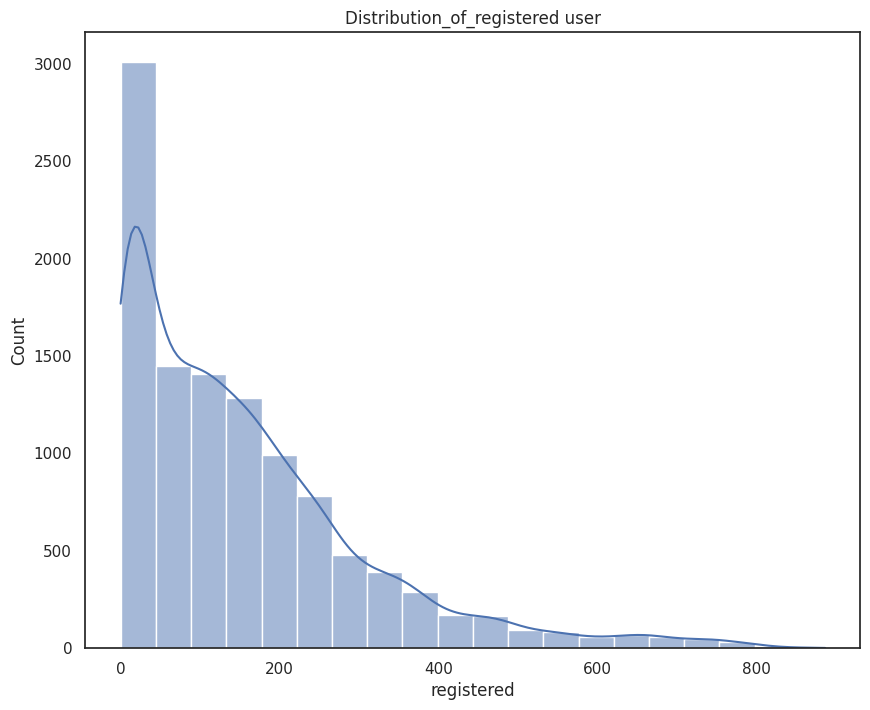

In [ ]:
#Distribution of registered_user
plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['registered'],bins = 20,kde = True)
plt.title('Distribution_of_registered user')
plt.show()

* Distribution of registered user is positively skewed, that means we have higher no of regstered user

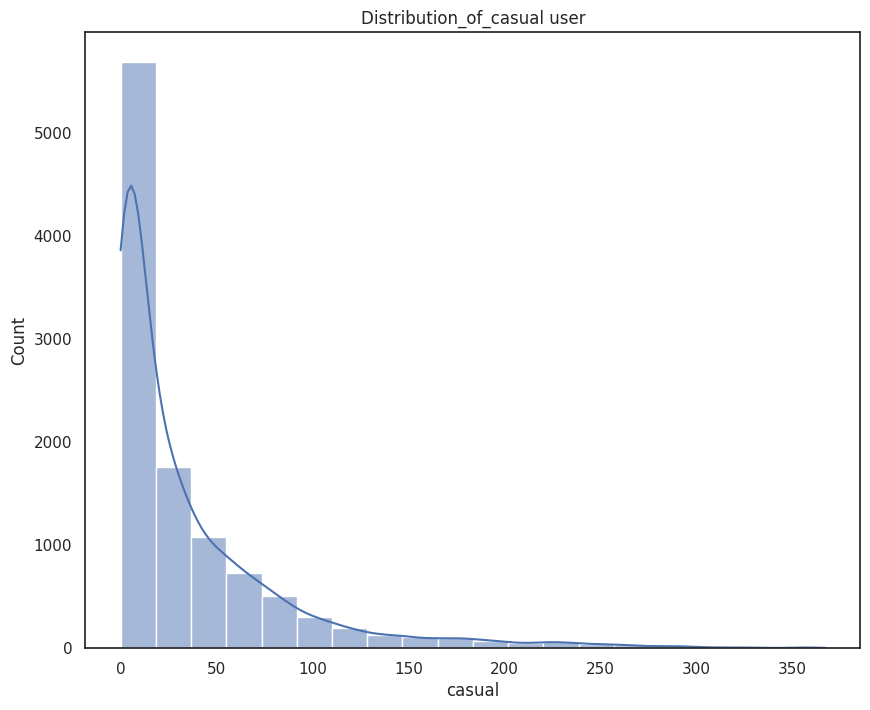

In [ ]:
#Distribution of casual user

plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['casual'],bins = 20,kde = True)

plt.title('Distribution_of_casual user')
plt.show()

* we also have higher no of casual user, but the outlier are also less here and the distribution is positively skewed.

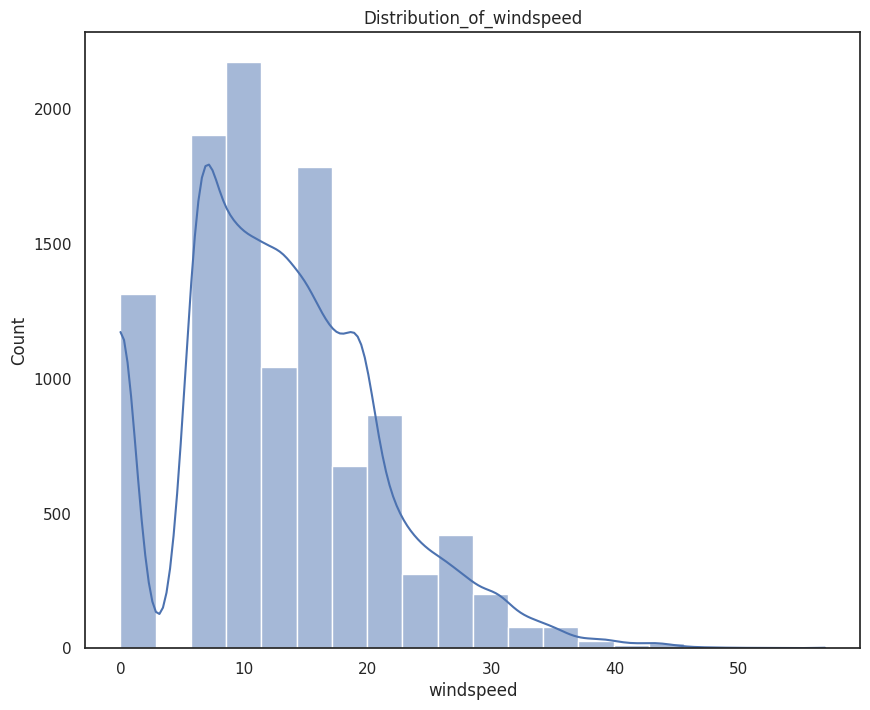

In [ ]:
#Distribution of windspeed
plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['windspeed'], bins = 20, kde = True)
plt.title('Distribution_of_windspeed')
plt.show()

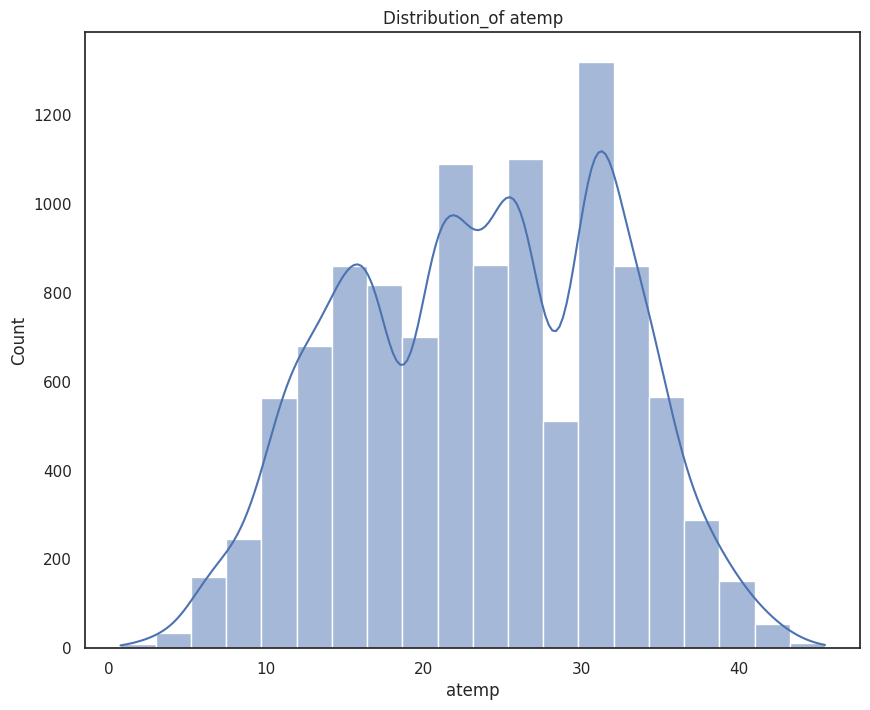

In [ ]:
#Distribution of atemp
plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['atemp'], bins = 20, kde = True)
plt.title('Distribution_of atemp')
plt.show()

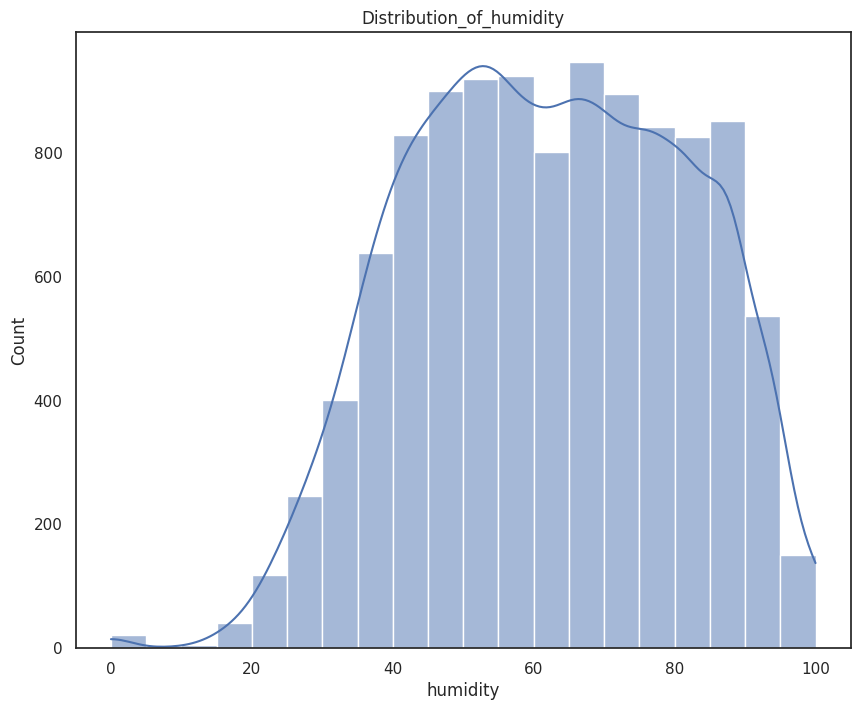

In [ ]:
#Distribution of humidity
plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['humidity'], bins = 20, kde = True)
plt.title('Distribution_of_humidity')
plt.show()

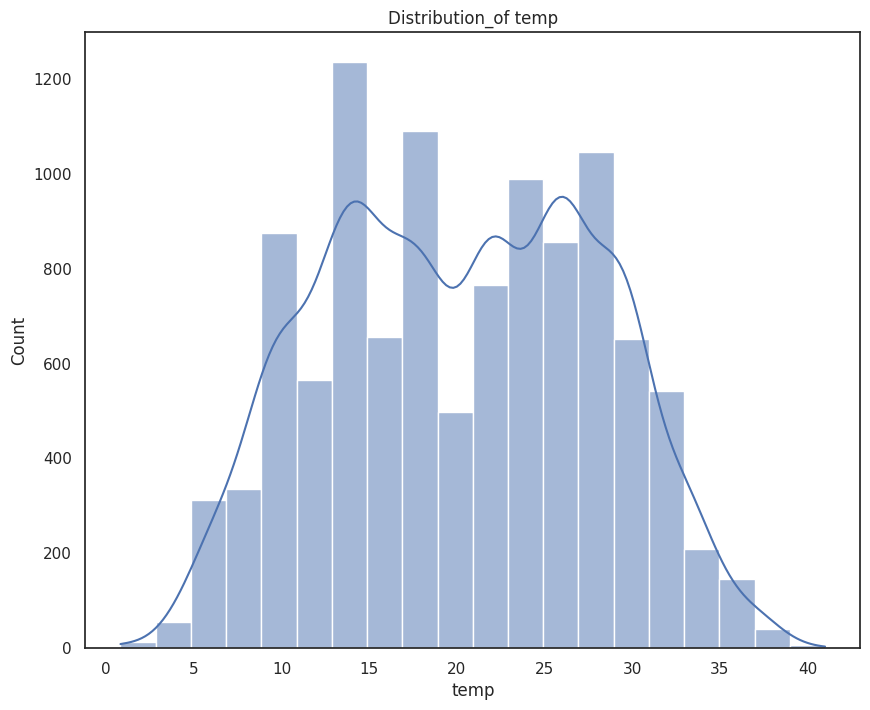

In [ ]:
#Distribution of temp
plt.figure(figsize = (10,8))
sns.set_style('white')
sns.histplot(df['temp'], bins = 20, kde = True)
plt.title('Distribution_of temp')
plt.show()

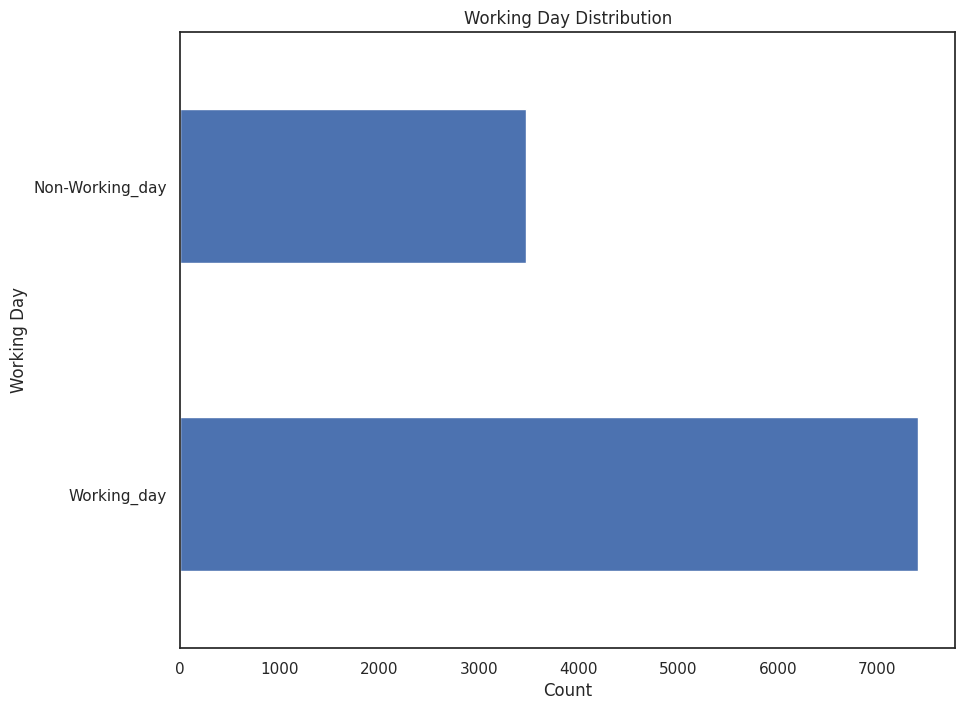

In [ ]:
plt.figure(figsize = (10,8))
workingday_counts = df['workingday'].value_counts()

workingday_labels_dict = {
    0 : 'Non-Working_day',
    1 : 'Working_day'
}
labels = [workingday_labels_dict.get(key,key) for key in workingday_counts.index.tolist()]

workingday_counts.index = labels
workingday_counts.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Working Day')
plt.title('Working Day Distribution')
plt.show()

* we can see that people tend to use yulu bike more in the working day.

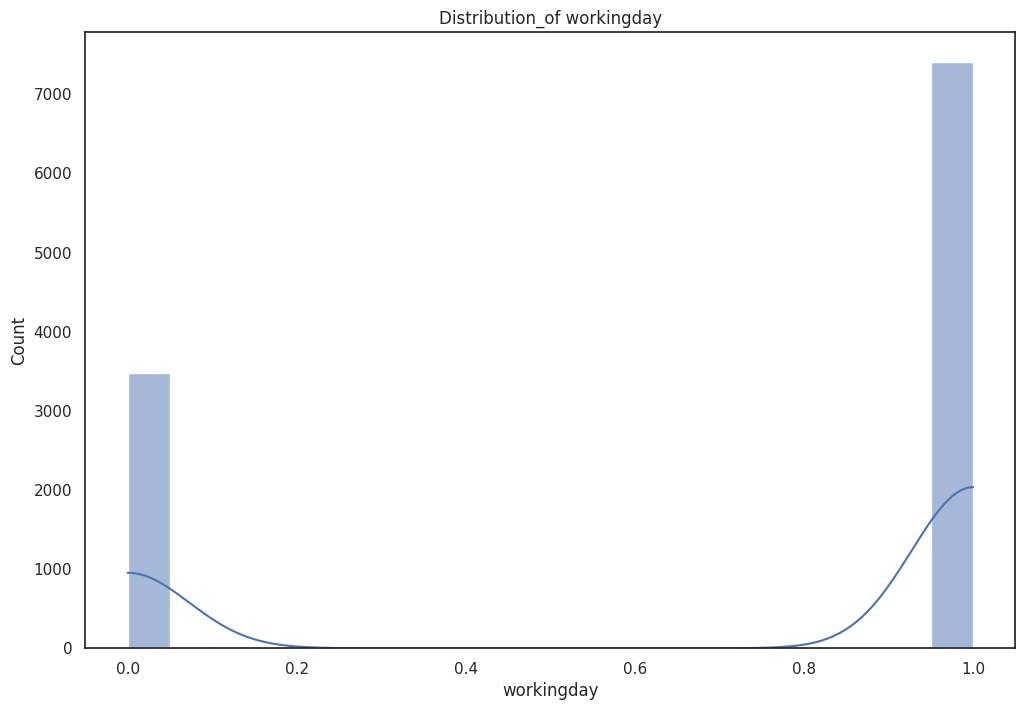

In [ ]:
#Distribution of workingday
plt.figure(figsize = (12,8))
sns.set_style('white')
sns.histplot(df['workingday'], bins = 20, kde = True)
plt.title('Distribution_of workingday')
plt.show()

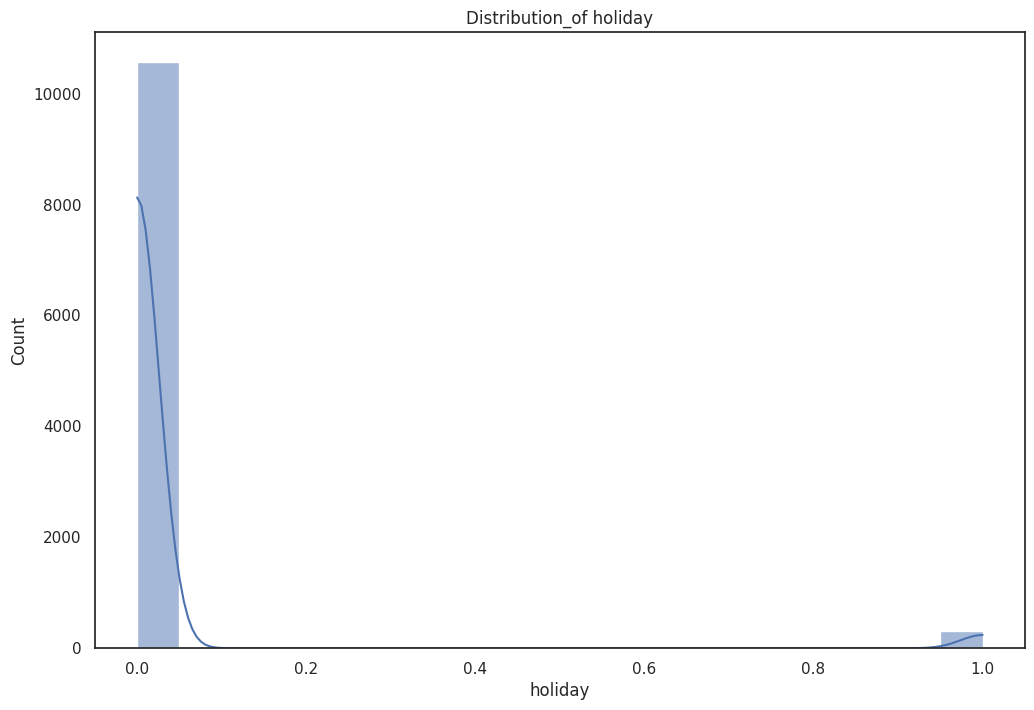

In [ ]:
#Distribution of holiday
plt.figure(figsize = (12,8))
sns.set_style('white')
sns.histplot(df['holiday'], bins = 20, kde = True)
plt.title('Distribution_of holiday')
plt.show()

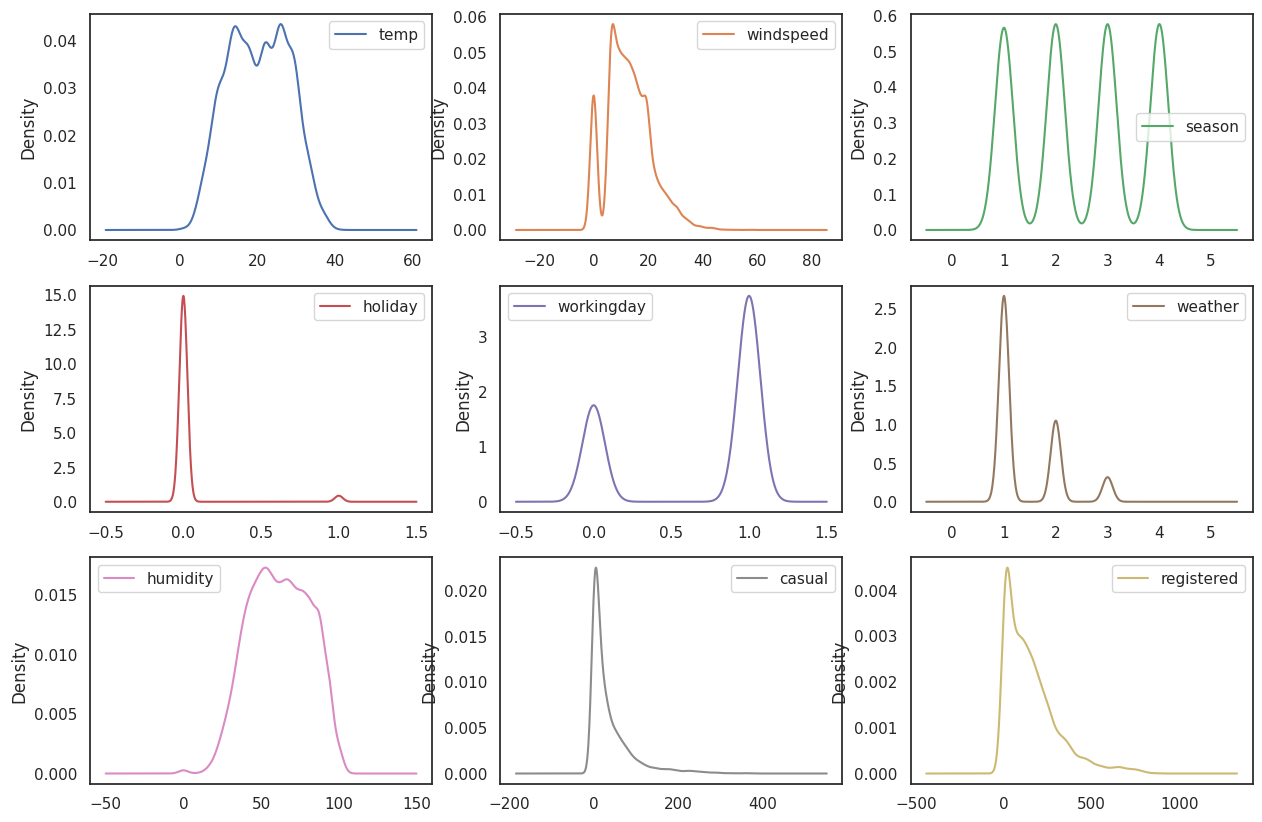

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
df[['temp','windspeed','season','holiday','workingday','weather','humidity','casual','registered']].plot(kind = 'density', subplots = True,layout = (3,3), sharex = False)
plt.show()

##<font color = yellow>**Checking the outliers**</font>

In [ ]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Axes: ylabel='windspeed'>

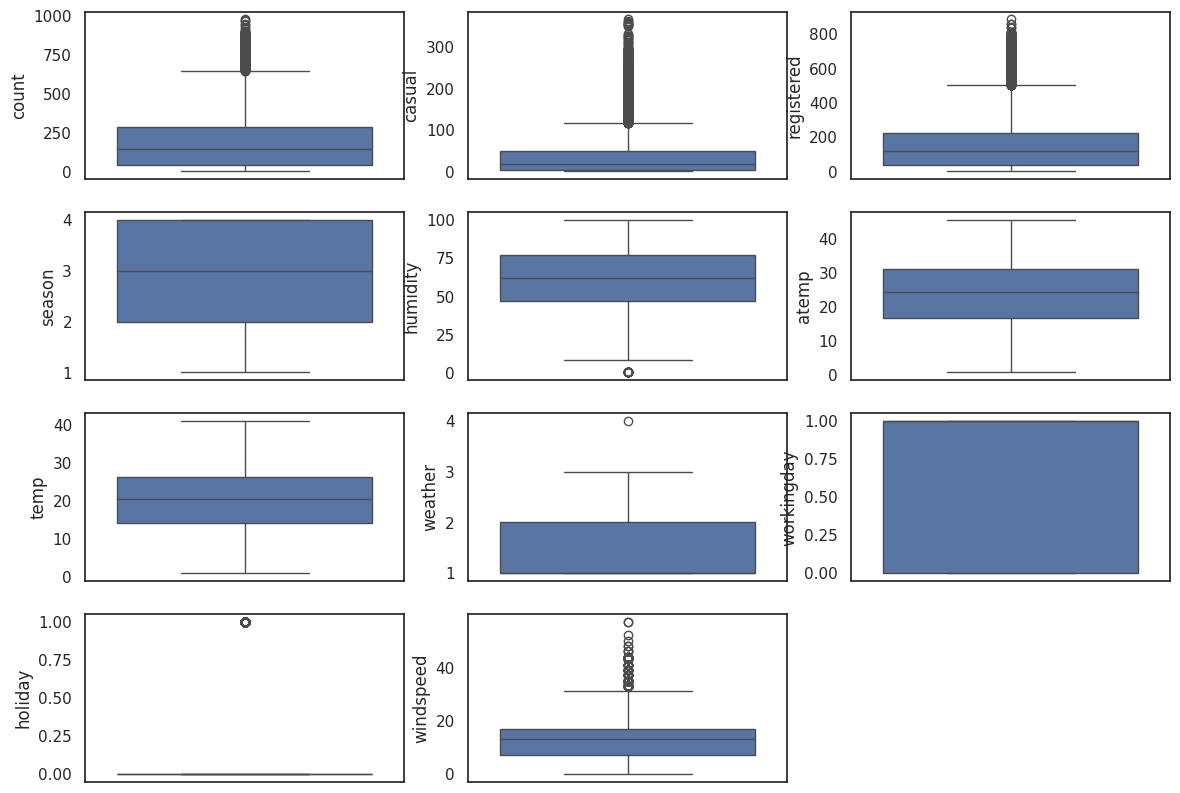

In [ ]:
plt.figure(figsize = (14,10))

plt.subplot(4,3,1)
sns.boxplot(df['count'])

plt.subplot(4,3,2)
sns.boxplot(df['casual'])

plt.subplot(4,3,3)
sns.boxplot(df['registered'])

plt.subplot(4,3,4)
sns.boxplot(df['season'])

plt.subplot(4,3,5)
sns.boxplot(df['humidity'])

plt.subplot(4,3,6)
sns.boxplot(df['atemp'])

plt.subplot(4,3,7)
sns.boxplot(df['temp'])

plt.subplot(4,3,8)
sns.boxplot(df['weather'])

plt.subplot(4,3,9)
sns.boxplot(df['workingday'])

plt.subplot(4,3,10)
sns.boxplot(df['holiday'])

plt.subplot(4,3,11)
sns.boxplot(df['windspeed'])

## Loads of outliers in the data -> count, casual, registered, windspeed

## <font color='Red'>**Clipping the Outliers**</font>

In [ ]:
#count_column
lower_percentile = 0.05
upper_percentile = 0.95

lower_bound = df['count'].quantile(lower_percentile)
upper_bound = df['count'].quantile(upper_percentile)

df['count_clipped'] = df['count'].clip(lower_bound, upper_bound)

#casual_column
lower_bound = df['casual'].quantile(lower_percentile)
upper_bound = df['casual'].quantile(upper_percentile)

df['casual_clipped'] = df['casual'].clip(lower_bound, upper_bound)

#registered column
lower_bound = df['registered'].quantile(lower_percentile)
upper_bound = df['registered'].quantile(upper_percentile)

df['registered_clipped'] = df['registered'].clip(lower_bound, upper_bound)

#windspeed column
lower_bound = df['windspeed'].quantile(lower_percentile)
upper_bound = df['windspeed'].quantile(upper_percentile)

df['windspeed_clipped'] = df['windspeed'].clip(lower_bound, upper_bound)


<Axes: ylabel='windspeed_clipped'>

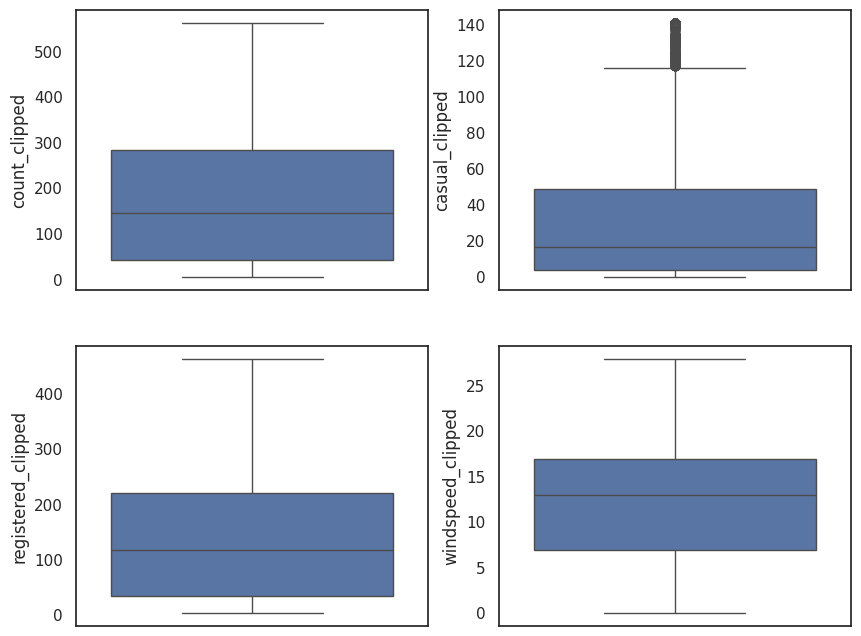

In [ ]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
sns.boxplot(df['count_clipped'])

plt.subplot(2,2,2)
sns.boxplot(df['casual_clipped'])

plt.subplot(2,2,3)
sns.boxplot(df['registered_clipped'])

plt.subplot(2,2,4)
sns.boxplot(df['windspeed_clipped'])

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'count_clipped', 'casual_clipped', 'registered_clipped',
       'windspeed_clipped'],
      dtype='object')

##<font color='yellow'>**Relationship between the Dependent and Independent Variables.**</font>

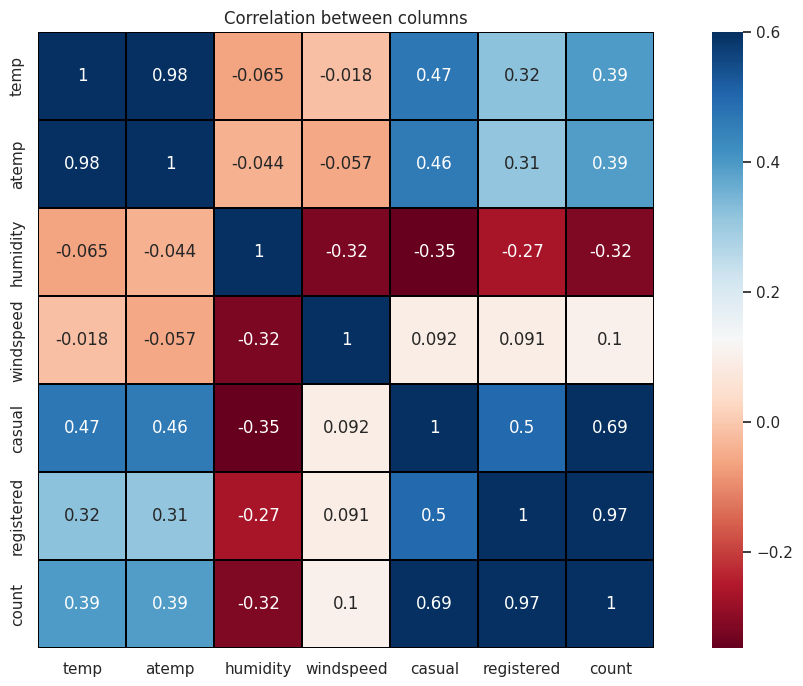

In [ ]:
df_1 = df[['temp','atemp','humidity','windspeed','casual','registered','count']]

sns.set(font_scale=1.0)
plt.figure(figsize=(15,8))
correlation_values = df_1.corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between columns');

## <font color = yellow>**If there is any significant difference between the no. of bike rides on Weekdays**</font>


In [ ]:
# Converting_datetime_column_to_datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['day'] = df['datetime'].dt.day_name()
df['weekends'] = df['datetime'].apply(lambda x: 1 if x.day_name() in ['Saturday','Sunday'] else 0)
df.groupby(['weekends'])['count'].mean()

weekends
0    192.724589
1    188.765096
Name: count, dtype: float64

### Step : 1


*   Null Hypothesis(H0): There is no significant difference between the no of bike ride on weekends and weekdays
*   Alternate Hypothesis(Ha): There is significant difference between the no of bike ride on weekends and weekdays
*   Alpha = 0.05


In [ ]:
#sample independent T_Test
from scipy.stats import ttest_ind

t_stat, pval = ttest_ind(df[df['weekends']==1]['count'],df[df['weekends']==0]['count'],alternative = 'two-sided')

print(f't_stat: {t_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We Reject Null Hypothesis, There is significant difference between the no of bike rides on weekends and weekdays')
else:
  print('We Fail to Reject Null Hypothesis, There is no significant difference between the no of bike rides on weekends and weekdays')

t_stat: -1.0354386367292092
pval: 0.30048711429228286
We Fail to Reject Null Hypothesis, There is no significant difference between the no of bike rides on weekends and weekdays


## <font color = yellow>**Check if the demand of bicycles on rent is the same for different Weather conditions?**</font>



*   Null Hypothesis(H0): Demand for bicycles on rent is same for all the weather conditions.
*   Alternate Hypothesis(Ha): Demand for bicycles on rent is not same for different weather conditions.

Aplha = 0.05

In [ ]:
# One_Way_Anova
df['weather'].unique()

array([1, 2, 3, 4])

<font color = orange>**To implement the One-way ANOVA test, we need to make sure that they are satisfying certain conditions:**</font>

    Data should be normally distributed (i.e, Gaussian)

    Data should be independent across each record

    Equal variance in different groups

##<font color = red>**QQ_PLot**</font>

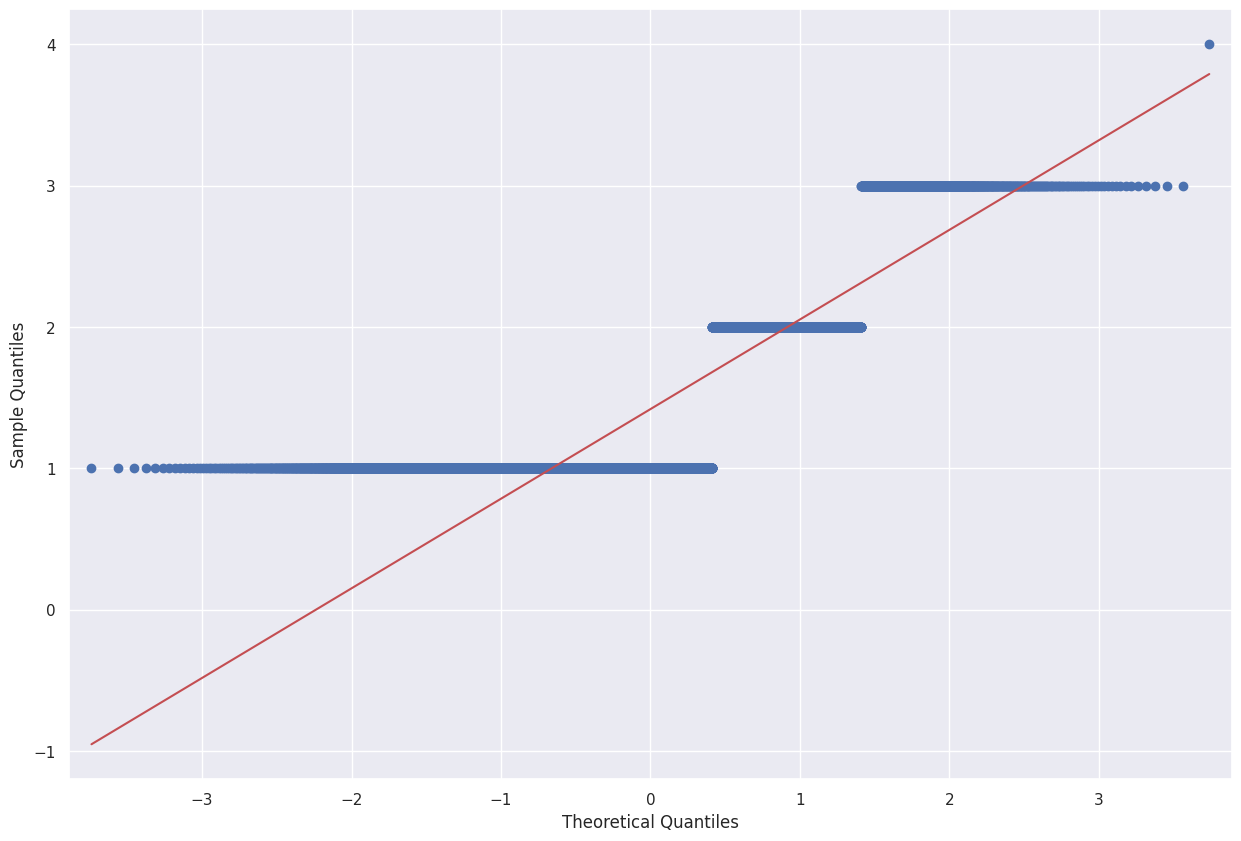

In [ ]:
#qq_plot
from statsmodels.graphics.gofplots import qqplot

weather = df['weather']
qqplot(weather,line ='s')
plt.show()

Data is not noemally distributed

## <font color = red>**shapiro_wilk test**<font>


*  Here's how it works:

If the p-value is high (greater than, say, 0.05),
It suggests that the data likely does come from a normal distribution.
Conversely, if the p-value is low (less than 0.05),
It indicates that the data's distribution significantly differs from a normal distribution.



In [ ]:
#shapiro_wilk test
from scipy.stats import shapiro

weather = df['weather']

np.random.sample(42)
weather_subset = weather.sample(100)


s_test, pval = shapiro(weather_subset)

print(f's_test: {s_test}')
print(f'pval: {pval}')

if pval < alpha:
  print('Data is not Normally Distributed')
else:
  print('Data is Normally Distributed')

s_test: 0.6656718254089355
pval: 9.165855330587822e-14
Data is not Normally Distributed


##<font color = orange>**checking the variance**</font>
* Levene's test

In [ ]:
from scipy.stats import levene
weather1 = df[df['weather']==1]['count']
weather2 = df[df['weather']==2]['count']
weather3 = df[df['weather']==3]['count']
weather4 = df[df['weather']==4]['count']

l_stat,pval = levene(weather1,weather2,weather3,weather4)


print(f'l_stat: {l_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We reject H0,Variances are not equal')
else:
  print('We fail to reject H0,Variances are equal')

l_stat: 54.85106195954556
pval: 3.504937946833238e-35
We reject H0,Variances are not equal


* variances are not equal

##<font color = red>**kruskal_wallis test**</font>
* since the data is not normally distributed we perform kruskal wallis test


In [ ]:
from scipy.stats import kruskal

weather1 = df[df['weather']==1]['count']
weather2 = df[df['weather']==2]['count']
weather3 = df[df['weather']==3]['count']
weather4 = df[df['weather']==4]['count']

k_test,pval = kruskal(weather1,weather2,weather3,weather4)

print(f'k_test: {k_test}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We Reject Null Hypothesis, Demand for bicycles on rent is not same for different weather conditions.')
else:
  print('We Fail to Reject Null Hypothesis, Demand for bicycles on rent is same for all the weather conditions.')

k_test: 205.00216514479087
pval: 3.501611300708679e-44
We Reject Null Hypothesis, Demand for bicycles on rent is not same for different weather conditions.


* since demand for bike rent is dependant on weather conditions we could do more analysis as in for which type of weather the demand for yulu bike is more and based on that we can make strategies to promote yulu.

##<font color = yellow>**Check if the demand of bicycles on rent is the same for different Seasons?**</font>

* Null Hypothesis(H0): Demand for Bicycles on rent is same for all seasons
* Alternate Hypothesis(H0): Demand for Bicycles on rent is different for all seasons

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

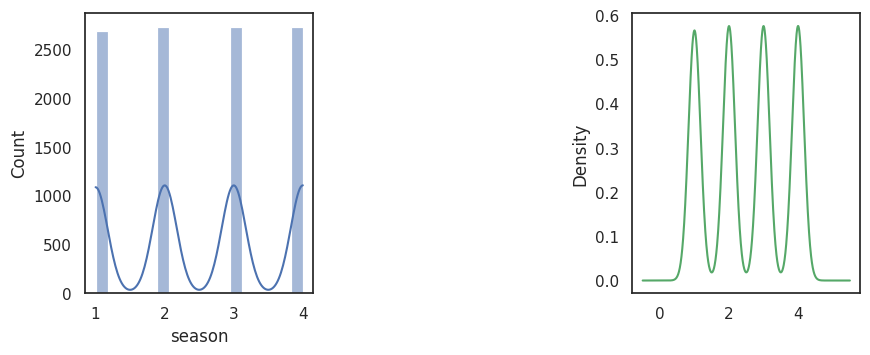

In [ ]:
#checking if data is normally distributed or not?
plt.figure(figsize = (10,8))

plt.subplot(2,3,1)
sns.set_style('white')
sns.histplot(df['season'],kde= True)

plt.subplot(2,3,3)
df['season'].plot(kind = 'density', subplots = True, sharex = False,color = 'g')
plt.show()

Data is not following gaussian dist

##<font color = red>**QQ_Plot**</font>

<Figure size 1000x800 with 0 Axes>

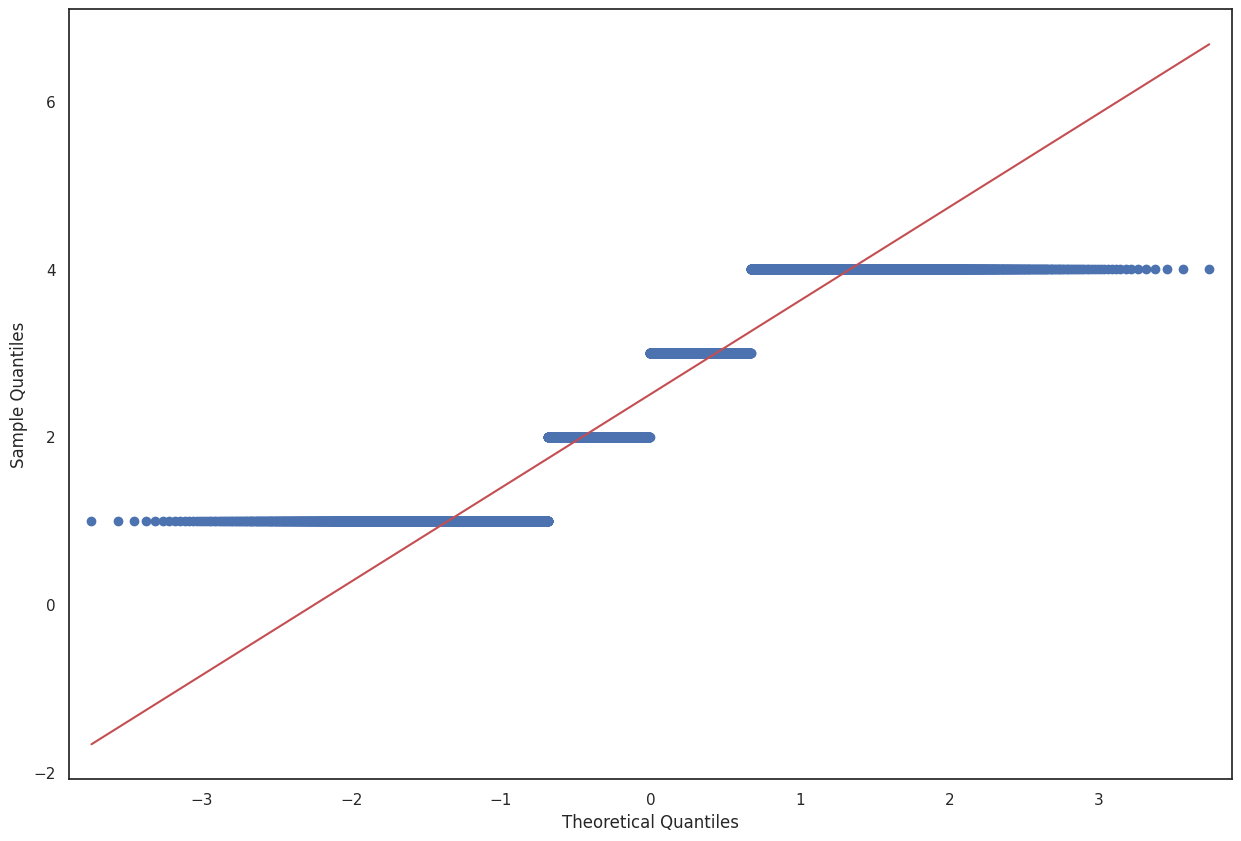

In [ ]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize = (10,8))
season = df['season']
qqplot(season,line ='s')
plt.show()

Doesn't follow normal distribution

##<font color = red>**Shapiro_wilk test**</font>

In [ ]:
from scipy.stats import shapiro

season = df['season']

np.random.sample(42)
season_subset = season.sample(100)


s_test, pval = shapiro(season_subset)

print(f's_test: {s_test}')
print(f'pval: {pval}')

if pval < alpha:
  print('Data is not Normally Distributed')
else:
  print('Data is Normally Distributed')

s_test: 0.861840009689331
pval: 3.331458486854899e-08
Data is not Normally Distributed


##<font color = orange>**checking the variance**</font>
* Levene's test

In [ ]:
from scipy.stats import levene
season1 = df[df['season']==1]['count']
season2 = df[df['season']==2]['count']
season3 = df[df['season']==3]['count']
season4 = df[df['season']==4]['count']

l_stat,pval = levene(season1,season2,season3,season4)


print(f'l_stat: {l_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We reject H0,Variances are not equal')
else:
  print('We fail to reject H0,Variances are equal')

l_stat: 187.7706624026276
pval: 1.0147116860043298e-118
We reject H0,Variances are not equal


##<font color = red>**kruskal_wallis test**</font>
* since the data is not normally distributed we perform kruskal wallis test


In [ ]:
from scipy.stats import kruskal

weather1 = df[df['weather']==1]['count']
weather2 = df[df['weather']==2]['count']
weather3 = df[df['weather']==3]['count']
weather4 = df[df['weather']==4]['count']

k_test,pval = kruskal(weather1,weather2,weather3,weather4)

print(f'k_test: {k_test}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We Reject Null Hypothesis, Demand for bicycles on rent is not same for all seasons.')
else:
  print('We Fail to Reject Null Hypothesis, Demand for bicycles on rent is same for all the seasons.')

k_test: 205.00216514479087
pval: 3.501611300708679e-44
We Reject Null Hypothesis, Demand for bicycles on rent is not same for all seasons.


##<font color = yellow>**Check if the Weather conditions are significantly different during different Seasons?**</font>

*  Null Hypothesis(H0): Weather Conditions are almost same during different seasons
*  Alternate Hypothesis(Ha): Weather Conditions are not same during different seasons

In [ ]:
# Contingency Table against ‘Weather’ & ‘Season’ columns

contingency = pd.crosstab(df['weather'],df['season'])
contingency


season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


##<font color = red>**chisquare_contingency_test**</font>

In [ ]:
from scipy.stats import chi2_contingency

chi_stat, pval, dof, exp_freq  = chi2_contingency(contingency)

print(f'ch_stat: {ch_stat}')
print(f'pval: {pval}')
print(f'dof: {dof}')
print(f'exp_freq: {exp_freq}')

alpha = 0.05

if pval < alpha:
  print('we reject H0,weather conditions are not same during diff conditions')
else:
  print('we fail to reject H0,weather conditions are same during diff conditions')

ch_stat: 49.15865559689363
pval: 1.5499250736864862e-07
dof: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
we reject H0,weather conditions are not same during diff conditions


##<font color = green>**Recommendations**</font>
Based on the results, here are some simple recommendations for Yulu Bikes:

1. **Adjust Bike Availability**:
    - **Good Weather**: Provide more bikes on sunny and clear days when demand is higher.
    - **Bad Weather**: Provide fewer bikes on rainy or stormy days to avoid damage and save costs.

2. **Plan for Seasons**:
    - **Peak Seasons**: Increase bike availability and promotions during popular biking seasons like spring and autumn.
    - **Off Seasons**: Offer discounts during winter or less popular times to encourage rentals.

3. **Weather-Based Pricing**:
    - **Dynamic Prices**: Charge more on days with good weather and offer discounts on less favorable days.

4. **Communicate with Customers**:
    - **Weather Alerts**: Use the app to give real-time weather updates and advice on biking conditions.
    - **Seasonal Tips**: Share tips for biking in different weather and seasons, like wearing the right clothing.

5. **Maintenance and Safety**:
    - **Regular Checks**: Ensure bikes are well-maintained, especially before bad weather.
    - **Safety Features**: Equip bikes with features like skid-resistant tires and lights for safety in various conditions.

6. **Use Data Wisely**:
    - **Analyze Patterns**: Monitor bike usage and weather data to improve service.
    - **Gather Feedback**: Listen to customer feedback to make improvements.

7. **Targeted Marketing**:
    - **Weather Campaigns**: Promote biking benefits according to the weather, like the eco-friendly aspect on sunny days.
    - **Seasonal Deals**: Offer special deals during high-demand seasons to attract more customers.

These steps will help Yulu Bikes better manage demand, improve customer satisfaction, and operate more efficiently.